In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys

In [3]:
os.listdir("data")

['aircraft carrier.npy',
 'airplane.npy',
 'alarm clock.npy',
 'ambulance.npy',
 'angel.npy',
 'animal migration.npy',
 'ant.npy',
 'anvil.npy',
 'apple.npy',
 'arm.npy',
 'asparagus.npy',
 'axe.npy',
 'backpack.npy',
 'banana.npy',
 'bandage.npy',
 'barn.npy',
 'baseball bat.npy',
 'baseball.npy',
 'basket.npy',
 'basketball.npy',
 'bat.npy',
 'bathtub.npy',
 'beach.npy',
 'bear.npy',
 'beard.npy',
 'bed.npy',
 'bee.npy',
 'belt.npy',
 'bench.npy',
 'bicycle.npy',
 'binoculars.npy',
 'bird.npy',
 'birthday cake.npy',
 'blackberry.npy',
 'blueberry.npy',
 'book.npy',
 'boomerang.npy',
 'bottlecap.npy',
 'bowtie.npy',
 'bracelet.npy',
 'brain.npy',
 'bread.npy',
 'bridge.npy',
 'broccoli.npy',
 'broom.npy',
 'bucket.npy',
 'bulldozer.npy',
 'bus.npy',
 'bush.npy',
 'butterfly.npy',
 'cactus.npy',
 'cake.npy',
 'calculator.npy',
 'calendar.npy',
 'camel.npy',
 'camera.npy',
 'camouflage.npy',
 'campfire.npy',
 'candle.npy',
 'cannon.npy',
 'canoe.npy',
 'car.npy',
 'carrot.npy',
 'castle

In [7]:
categories = []
with open('categories.txt', 'r') as categories_file:
    for category in categories_file:
        categories.append(category.strip())

In [1]:
import scipy
scipy.__version__

'1.2.1'

In [13]:
np.random.shuffle(categories)
ten_categories = categories[:10]


Fixed random selection of 10 differrenet categoires

In [17]:
ten_categories = ['wristwatch',
 'soccer ball',
 'flashlight',
 'fan',
 'binoculars',
 'diving board',
 'face',
 'penguin',
 'angel',
 'coffee cup']

In [27]:
image_set = [np.load('data/'+category+'.npy') for category in ten_categories]
for each in image_set:
    np.random.shuffle(each)

In [29]:
for i in range(len(image_set)):
    print("For",ten_categories[i], "there are", image_set[i].shape[0], "images")
    image_set[i] = image_set[i]/255 < 0.5

For wristwatch there are 162645 images
For soccer ball there are 125349 images
For flashlight there are 239763 images
For fan there are 136158 images
For binoculars there are 124190 images
For diving board there are 290239 images
For face there are 161666 images
For penguin there are 253791 images
For angel there are 149736 images
For coffee cup there are 183432 images


['wristwatch', 'soccer ball', 'flashlight', 'fan', 'binoculars', 'diving board', 'face', 'penguin', 'angel', 'coffee cup']


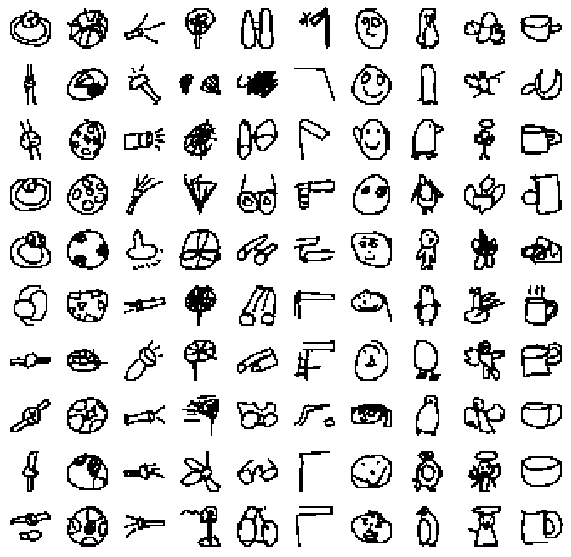

In [36]:
print(ten_categories)
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = image_set[(i-1)%10][i].reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


In [58]:
EACH_CATEGORY_IMAGES = 10_000
TEST_CATEGORY_IMAGES =  2_000
dataset = np.zeros((EACH_CATEGORY_IMAGES*len(image_set), 784+len(image_set)))
test_dataset = np.zeros((TEST_CATEGORY_IMAGES*len(image_set), 784+len(image_set)))

In [59]:
i = 0
for each_set in image_set:
    dataset[i*EACH_CATEGORY_IMAGES:(i+1)*EACH_CATEGORY_IMAGES, :784] = each_set[:EACH_CATEGORY_IMAGES]
    y = np.zeros((EACH_CATEGORY_IMAGES, 10))
    y[:, i] = 1
    dataset[i*EACH_CATEGORY_IMAGES:(i+1)*EACH_CATEGORY_IMAGES, 784:] = y
    i += 1
i = 0
for each_set in image_set:
    test_dataset[i*TEST_CATEGORY_IMAGES:(i+1)*TEST_CATEGORY_IMAGES, :784] = each_set[EACH_CATEGORY_IMAGES:EACH_CATEGORY_IMAGES+TEST_CATEGORY_IMAGES]
    y = np.zeros((TEST_CATEGORY_IMAGES, 10))
    y[:, i] = 1
    test_dataset[i*TEST_CATEGORY_IMAGES:(i+1)*TEST_CATEGORY_IMAGES, 784:] = y
    i += 1

In [60]:
np.random.shuffle(dataset)
np.random.shuffle(test_dataset)

soccer ball
penguin
diving board
fan
penguin
flashlight
coffee cup
angel
penguin
face


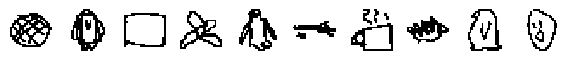

In [61]:
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    img = dataset[i][:784].reshape((28,28))
    cat = ten_categories[np.argmax(dataset[i][784:])]
    print(cat)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


binoculars
fan
face
coffee cup
soccer ball
binoculars
angel
binoculars
binoculars
angel


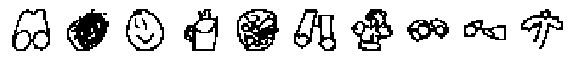

In [62]:
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    img = test_dataset[i][:784].reshape((28,28))
    cat = ten_categories[np.argmax(test_dataset[i][784:])]
    print(cat)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


In [68]:
X_train = dataset[:, :784]
Y_train = dataset[:, 784:]
X_test = test_dataset[:, :784]
Y_test = test_dataset[:, 784:]

In [69]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(100000, 784) (100000, 10)
(20000, 784) (20000, 10)


In [72]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'backend',
 'categories.txt',
 'data',
 'dataset_10_cat.npz',
 'README.md',
 'requirements.txt',
 'Understanding & Preparing Data.ipynb']

In [80]:
#os.mkdir("dataset")

In [89]:
for i in range(0, len(image_set)*EACH_CATEGORY_IMAGES, 2000):
    X_train = dataset[i:i+2000, :784]
    Y_train = dataset[i:i+2000, 784:]
    np.savez("dataset/train_set_"+str(int(i/2000))+".npz", X_train=X_train, Y_train=Y_train)
for i in range(0, len(image_set)*TEST_CATEGORY_IMAGES,TEST_CATEGORY_IMAGES):
    X_test = test_dataset[i:i+TEST_CATEGORY_IMAGES, :784]
    Y_test = test_dataset[i:i+TEST_CATEGORY_IMAGES, 784:]
    np.savez("dataset/test_set_"+str(int(i/TEST_CATEGORY_IMAGES))+".npz", X_test=X_test, Y_test=Y_test)

In [90]:
np.savez("dataset/categories.npz", categories=ten_categories)